https://leetcode.com/problems/binary-tree-paths/

In [5]:
from jupyterthemes import jtplot
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

jtplot.style('gruvboxd')
matplotlib.use('nbagg')


class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

        
def arr_to_bst(nums):
    
    if not nums:
        return
    
    nums = sorted(nums)
        
    n = len(nums)
    k = n // 2
        
    root = TreeNode(nums[k])
    root.left = arr_to_bst(nums[:k]) if k > 0 else None
    root.right = arr_to_bst(nums[k+1:]) if k+1 < n else None
    
    return root
    

def plot_bst(root, depth=0, ax=None):
    
    if not root:
        return ax
    
    if not ax:
        fig, ax = plt.subplots()
        ax.invert_yaxis()
    
    if root.left:
        ax.plot([root.val, root.left.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.left, depth+1, ax)
    
    if root.right:
        ax.plot([root.val, root.right.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.right, depth+1, ax)
        
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.annotate(root.val, (root.val, depth-0.05))
    
    return ax

<IPython.core.display.Javascript object>


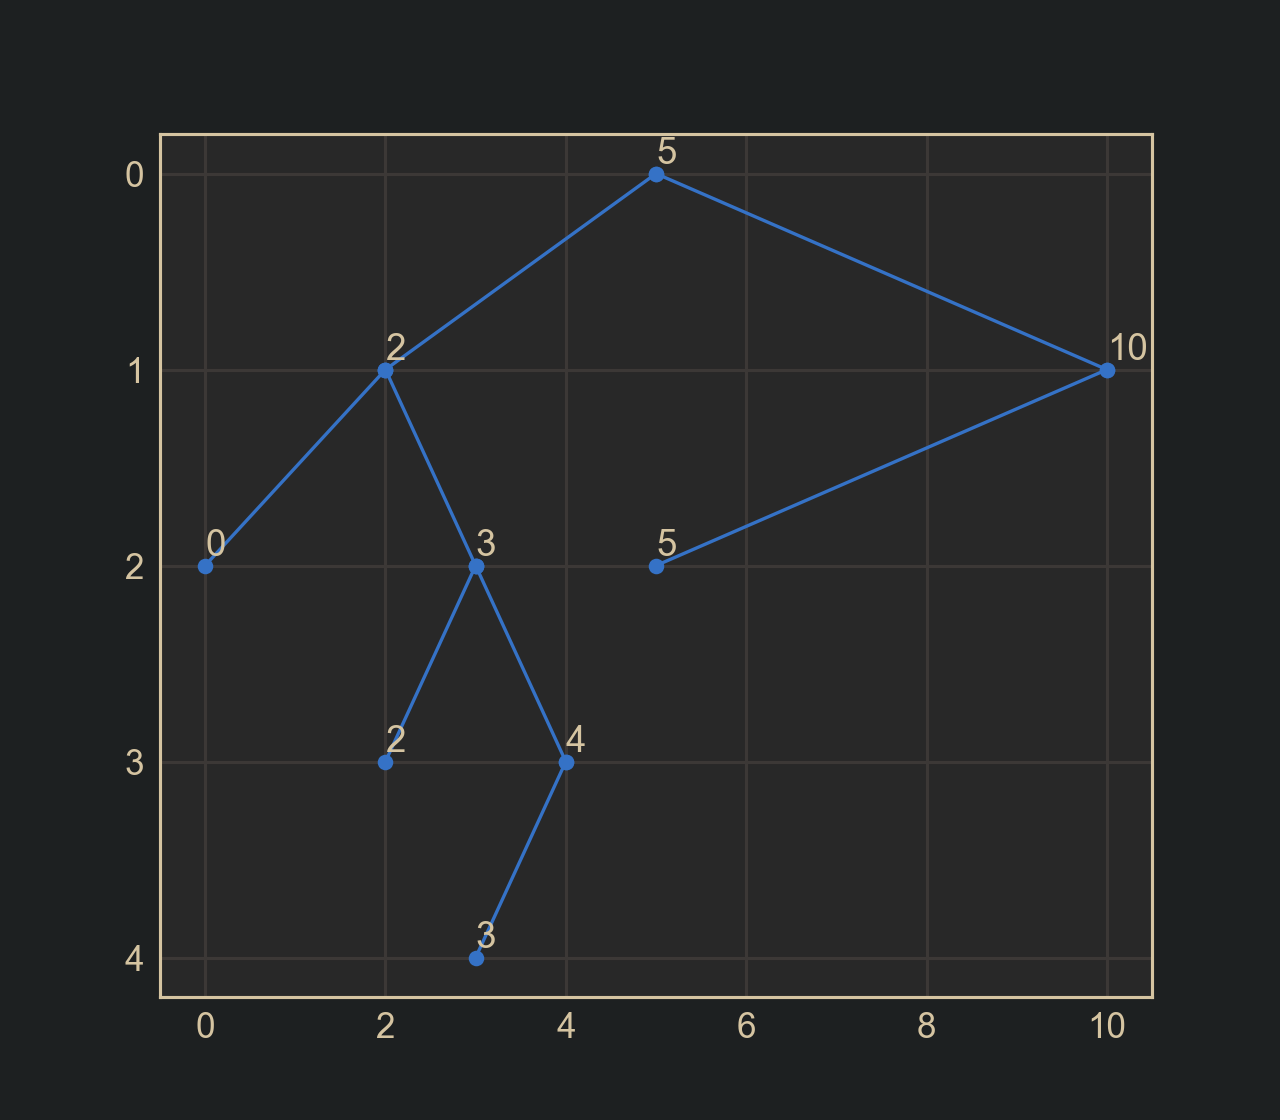

In [48]:
%matplotlib notebook

root = TreeNode(5)
root.left = TreeNode(2)
root.left.left = TreeNode(0)
root.left.right = TreeNode(3)
root.left.right.left = TreeNode(2)
root.left.right.right = TreeNode(4)
root.left.right.right.left = TreeNode(3)
root.right = TreeNode(10)
root.right.left = TreeNode(5)
#root.right.right = TreeNode(11)

ax = plot_bst(root)

# Solution

In [38]:
class Solution:
    def binaryTreePaths(self, root, paths=[]):
    
        if not root: return []
        paths = [path + '->' + str(root.val) for path in paths] if path else [str(root.val)]
        
        if not root.left and not root.right: return paths
        return self.binaryTreePaths(root.left, paths) \
            + self.binaryTreePaths(root.right, paths)

<IPython.core.display.Javascript object>


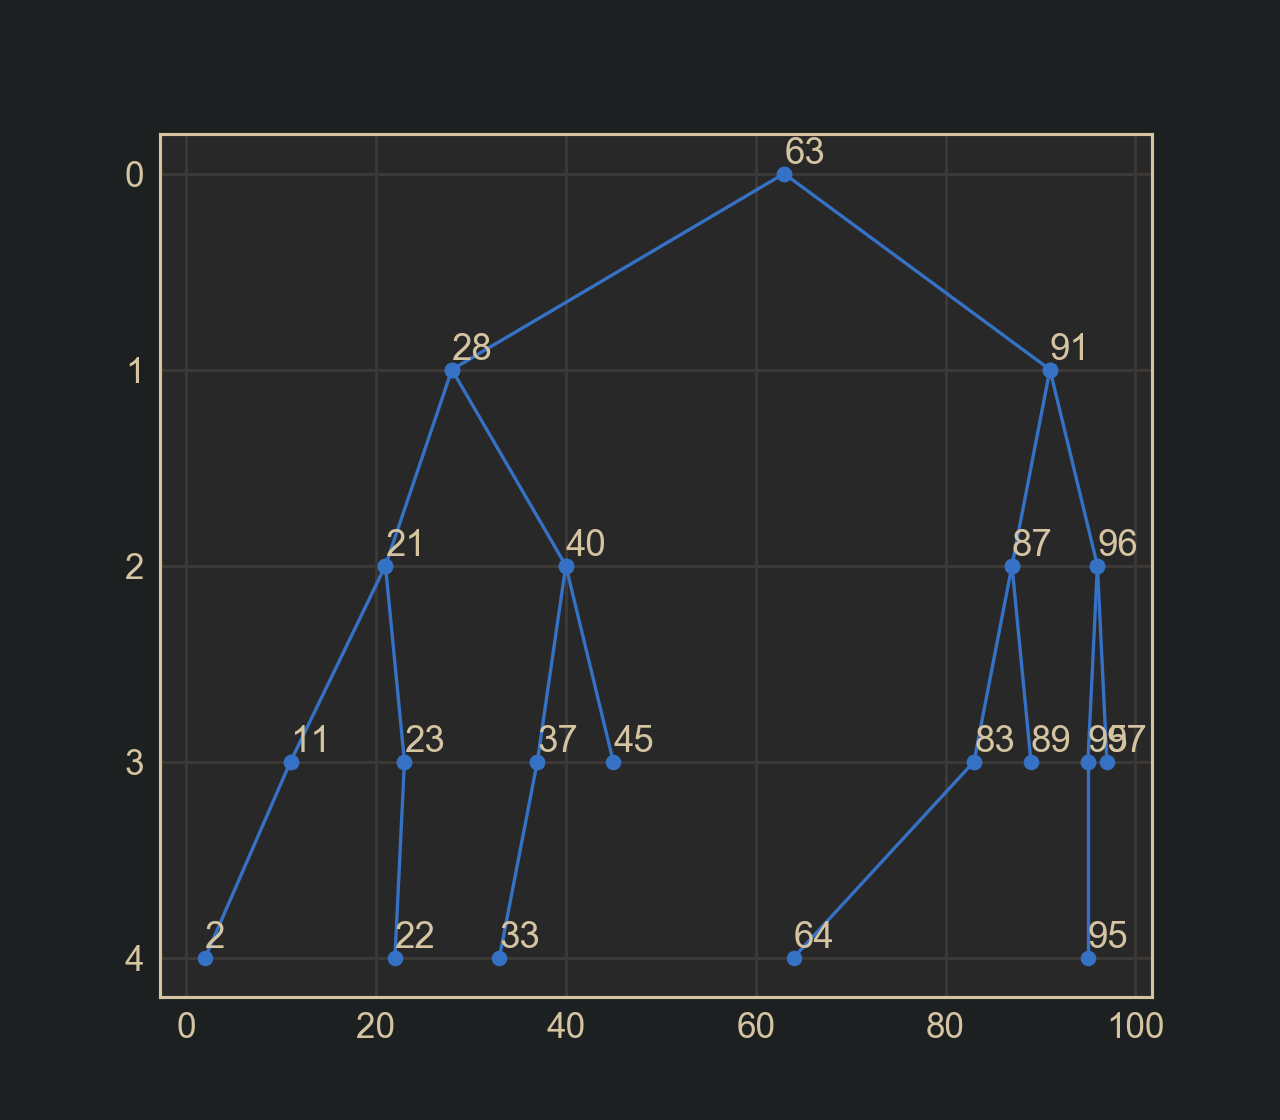

In [39]:
%matplotlib notebook

nums = sorted(np.random.randint(100, size=20))

root = arr_to_bst(nums)
ax = plot_bst(root)

In [40]:
Solution().binaryTreePaths(root)

['63->28->21->11->2',
 '63->28->21->23->22',
 '63->28->40->37->33',
 '63->28->40->45',
 '63->91->87->83->64',
 '63->91->87->89',
 '63->91->96->95->95',
 '63->91->96->97']